## EDA and Cleaning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [9]:
train = pd.read_csv('../datasets/train.csv', keep_default_na=False, na_values='')
test = pd.read_csv('../datasets/test.csv', keep_default_na=False, na_values='')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [11]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [12]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [13]:
train.isna().sum().sort_values(ascending=False).loc[lambda x: x > 0]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cond         1
Bsmt Qual           1
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Total Bsmt SF       1
BsmtFin Type 1      1
Bsmt Cond           1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
dtype: int64

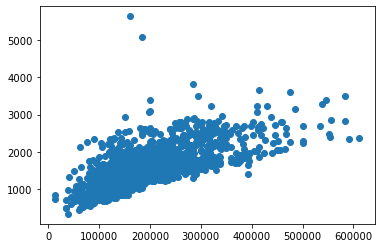

In [14]:
plt.scatter(train['SalePrice'], train['Gr Liv Area']);

In [15]:
train['Gr Liv Area'].sort_values(ascending=False)

960     5642
1885    5095
616     3820
1897    3672
1035    3608
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: Gr Liv Area, Length: 2051, dtype: int64

In [16]:
train.drop([960, 1885], inplace=True)

**I dropped these two outliers - the houses that were in the 5000+ sqft range.**

In [17]:
train['Gr Liv Area'].sort_values(ascending=False)

616     3820
1897    3672
1035    3608
1692    3500
1939    3493
        ... 
1292     498
1643     492
1518     480
432      438
1428     334
Name: Gr Liv Area, Length: 2049, dtype: int64

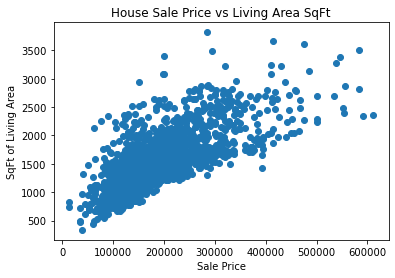

In [18]:
plt.scatter(train['SalePrice'], train['Gr Liv Area'])
plt.title('House Sale Price vs Living Area SqFt')
plt.xlabel('Sale Price')
plt.ylabel('SqFt of Living Area');

In [19]:
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [20]:
test.columns = test.columns.str.lower().str.replace(' ', '_')

In [21]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


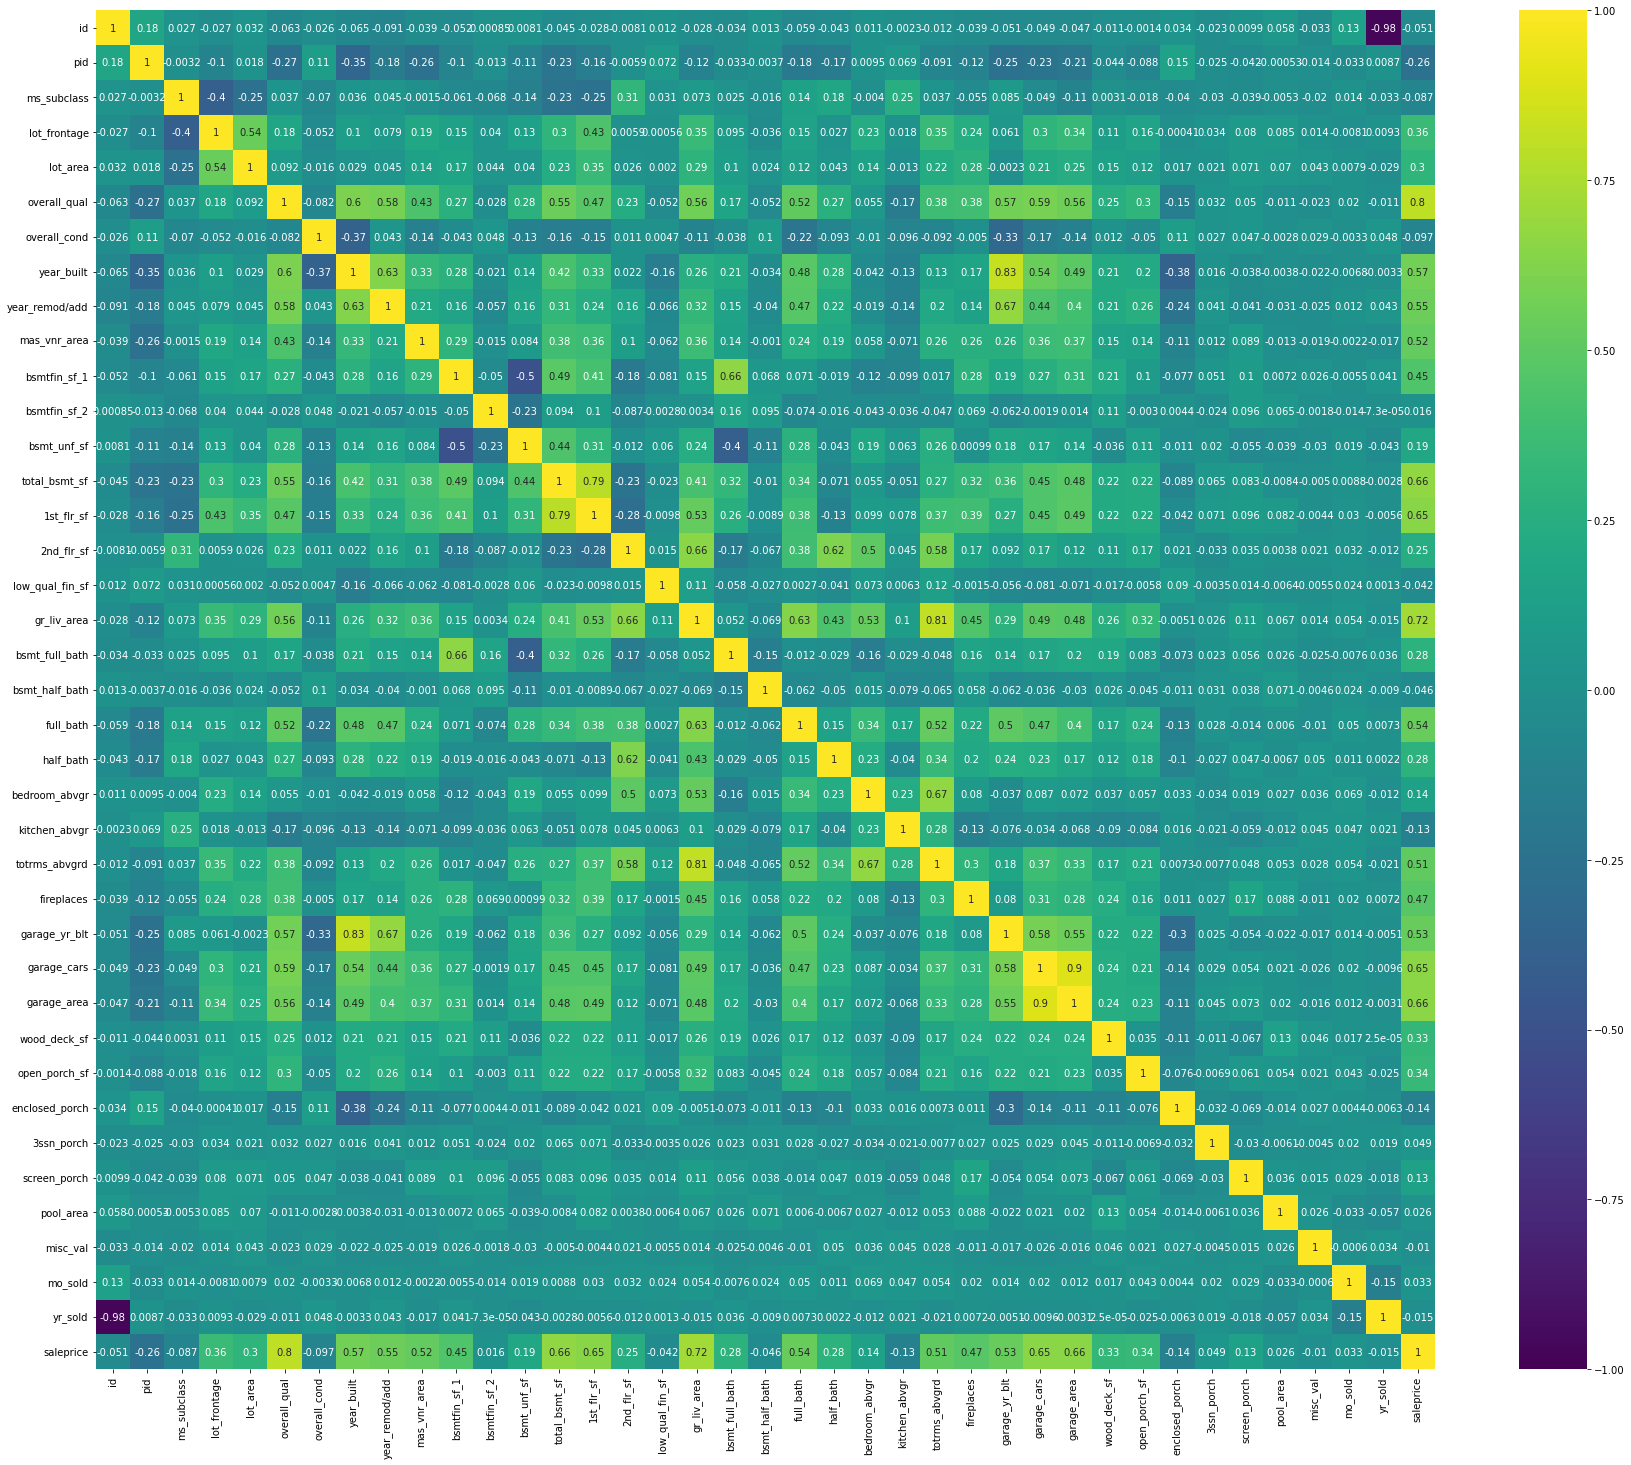

In [22]:
plt.figure(figsize=(30,25))
sns.heatmap(train.corr(), annot=True, vmin=-1, cmap='viridis');

This heatmap is a lot, but I wanted to get an idea of what the correlation coefficients were looking like for saleprice with the other numerical features

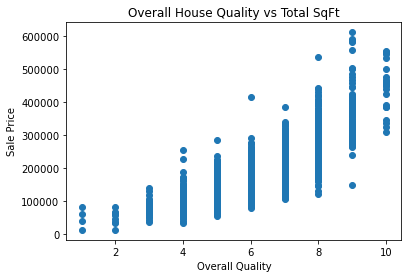

In [23]:
plt.scatter(x=train['overall_qual'], y=train['saleprice'])
plt.title('Overall House Quality vs Total SqFt')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

This above chart shows me that there is a positive correlation between overall quality of the house and the sale price, and it has a pretty significant effect on housing price.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     1719 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            2049 non-null   object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

In [25]:
train[train['saleprice'] >= 500000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
81,367,527214050,20,RL,63.0,17423,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2009,New,501837
138,2331,527210040,60,RL,60.0,18062,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,9,2006,New,545224
151,2333,527212030,60,RL,85.0,16056,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2006,New,556581
623,457,528176030,20,RL,100.0,14836,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,2,2009,WD,552000
800,1702,528118050,20,RL,59.0,17169,Pave,NA,IR2,Lvl,...,0,0,NA,NA,NA,0,8,2007,New,500067
823,16,527216070,60,RL,47.0,53504,Pave,NA,IR2,HLS,...,210,0,NA,NA,NA,0,6,2010,WD,538000
1164,424,528106020,20,RL,105.0,15431,Pave,NA,Reg,Lvl,...,170,0,NA,NA,NA,0,4,2009,WD,555000
1227,47,528176010,20,RL,110.0,14300,Pave,NA,Reg,HLS,...,0,0,NA,NA,NA,0,6,2010,WD,500000
1592,2335,527214060,60,RL,82.0,16052,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,7,2006,New,535000
1671,45,528150070,20,RL,100.0,12919,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,New,611657


In [26]:
train.drop(
    [81, 138, 151, 623, 800, 823, 
    1164, 1227, 1592, 1671, 1692,
    1796, 1964], inplace=True
)

##### Dropped all columns with houses above $500,000 sale price due to them being extreme outliers.

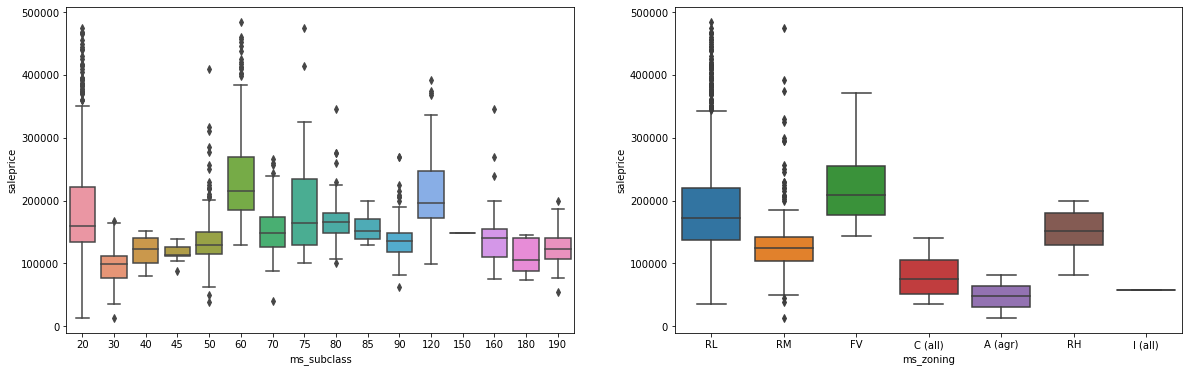

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x=train['ms_subclass'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['ms_zoning'], y=train['saleprice'], ax=ax[1]);

The above box plots are showing me that both of the variables (ms subclass and ms zoning) seem to have an effect on housing price, but as they're categorical variables they don't seem to be linear.

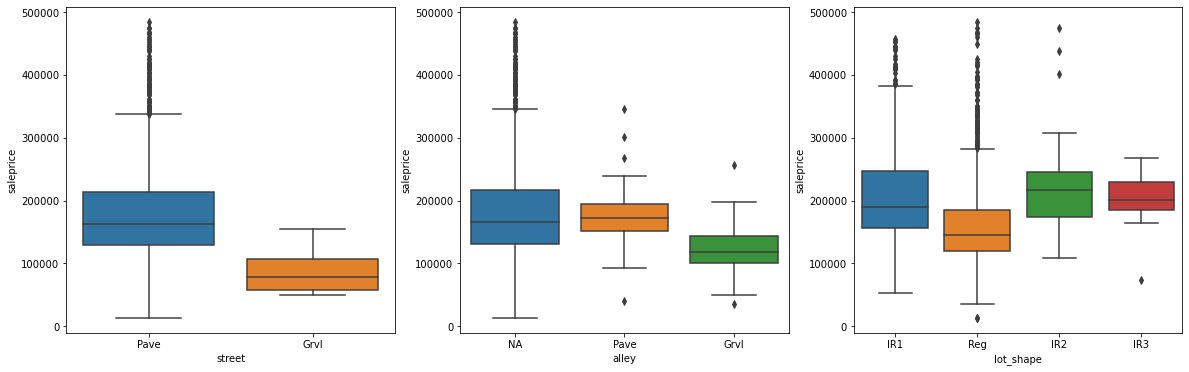

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['street'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['alley'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['lot_shape'], y=train['saleprice'], ax=ax[2]);

The above box plots are showing me that:
- The type of road access to the property has a definite affect on housing price
- The type of alley access has an effect, but not super high
- The lot shape doesn't have a big impact on housing price

In [29]:
train['lot_shape'] = train['lot_shape'].replace(
    {'IR3':'1', 'IR2':'2', 'IR1':'3', 'Reg':'4'}
).astype(int)

train['lot_shape'].dtype

dtype('int32')

In [30]:
test['lot_shape'] = test['lot_shape'].replace(
    {'IR3':'1', 'IR2':'2', 'IR1':'3', 'Reg':'4'}
).astype(int)

test['lot_shape'].dtype

dtype('int32')

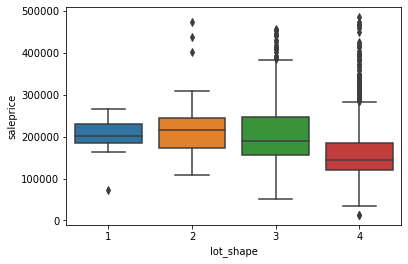

In [31]:
sns.boxplot(x=train['lot_shape'], y=train['saleprice']);

After ordinally encoding the lot_shape, it appears that it has a slight negative correlation to sale price.

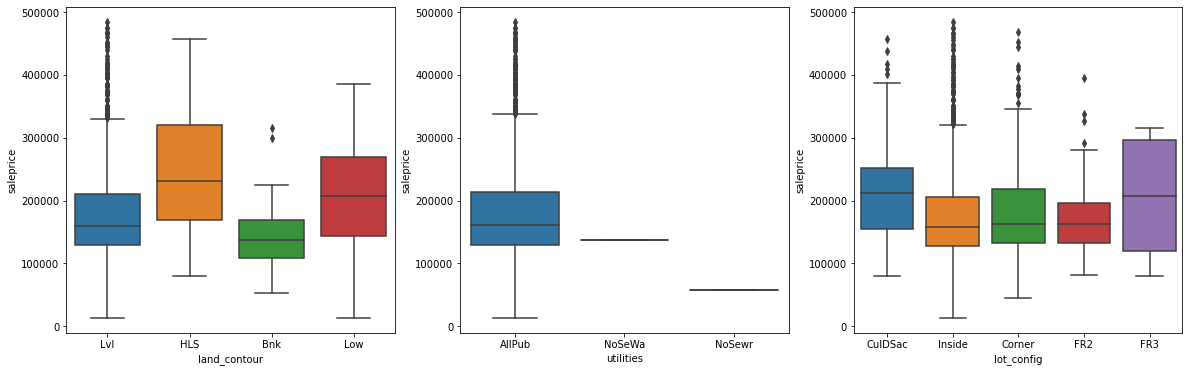

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['land_contour'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['utilities'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['lot_config'], y=train['saleprice'], ax=ax[2]);

These plots are showing me that:
- Land contour seems to have an effect on housing price, though it isn't linear
- The lot configuration doesn't have a huge effect on housing price either

In [33]:
train['utilities'] = train['utilities'].replace(
    {'NoSeWa':'1', 'NoSewr':'2', 'AllPub':'3'}
).astype(int)

train['utilities'].dtype

dtype('int32')

In [34]:
test['utilities'] = test['utilities'].replace(
    {'NoSeWa':'1', 'NoSewr':'2', 'AllPub':'3'}
).astype(int)

test['utilities'].dtype

dtype('int32')

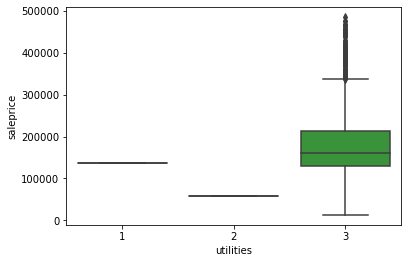

In [35]:
sns.boxplot(x=train['utilities'], y=train['saleprice']);

After ordinally encoding utilities, it appears that it does have an effect on housing price as most of the values are in the category with all utilities.

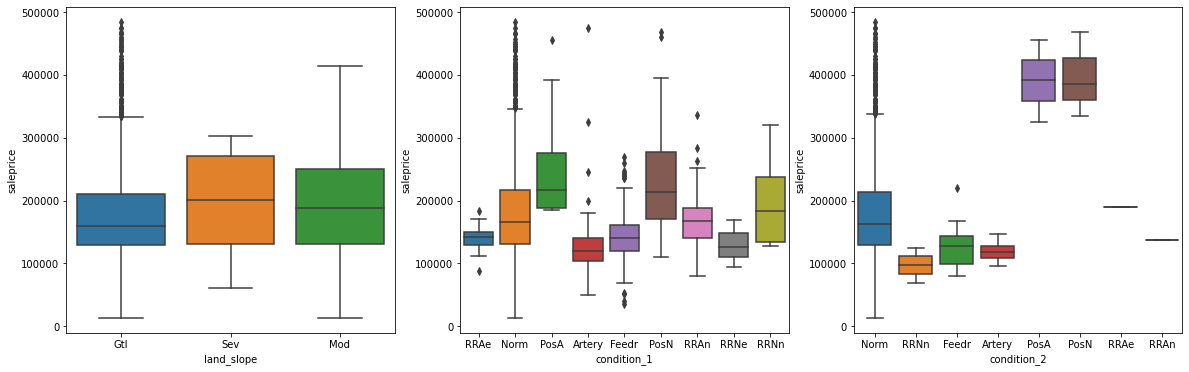

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['land_slope'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['condition_1'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['condition_2'], y=train['saleprice'], ax=ax[2]);

- The various conditions represented in the "Condition_1" and "Condition_2" graphs show great influence on housing price.

In [37]:
train['land_slope'] = train['land_slope'].replace(
    {'Sev':'1', 'Mod':'2', 'Gtl':'3'}
).astype(int)

train['land_slope'].dtype

dtype('int32')

In [38]:
test['land_slope'] = test['land_slope'].replace(
    {'Sev':'1', 'Mod':'2', 'Gtl':'3'}
).astype(int)

test['land_slope'].dtype

dtype('int32')

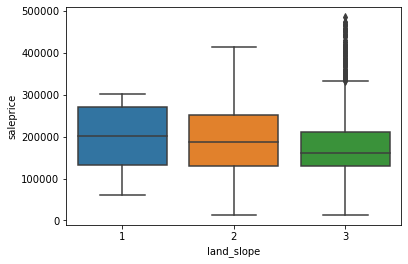

In [39]:
sns.boxplot(x=train['land_slope'], y=train['saleprice']);

After the oridinal encoding for land slope, there isn't a big influence here for sale price.

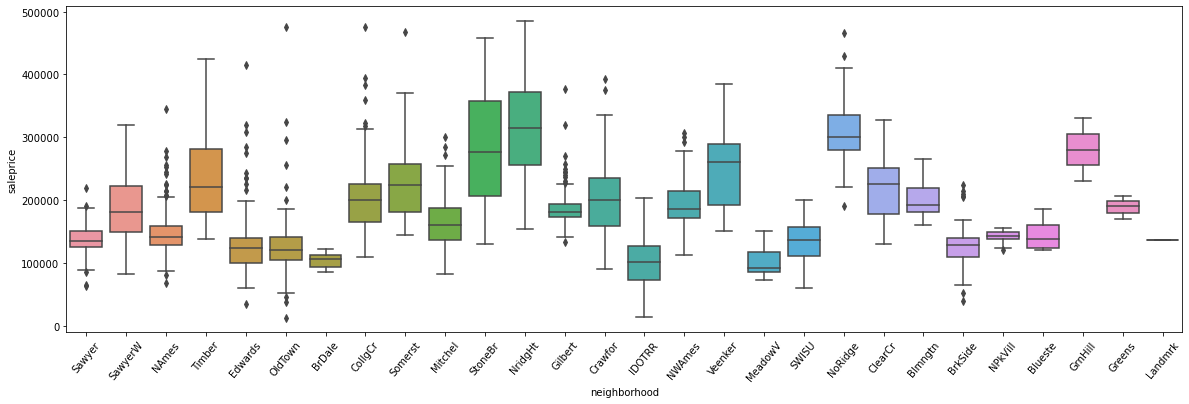

In [40]:
plt.figure(figsize=(20,6))
sns.boxplot(x=train['neighborhood'], y=train['saleprice'])
plt.xticks(rotation=50);

The neighborhood the house is in greatly determines the pricing of the house.

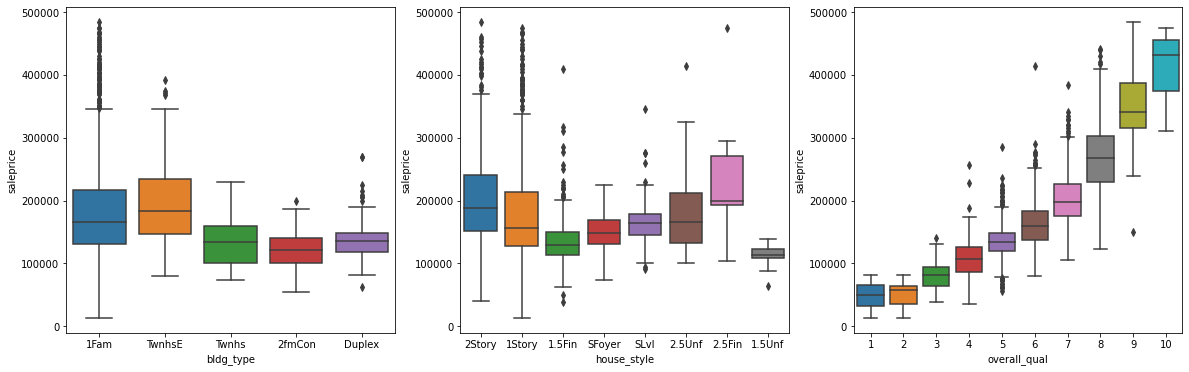

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['bldg_type'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['house_style'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['overall_qual'], y=train['saleprice'], ax=ax[2]);

- The biggest influence on sale price is the overall quality of the house. It's very positively linear.
- The building type has some influence, but not a lot.
- The house style has a decent impact on housing price.

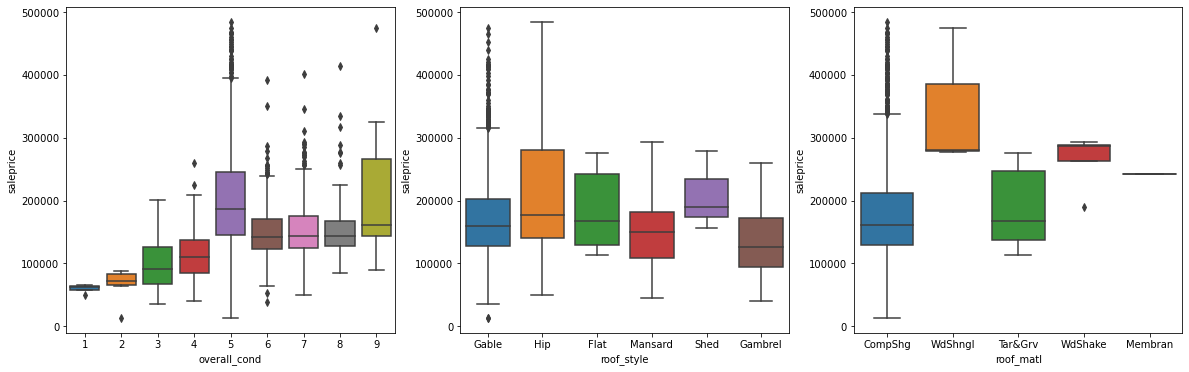

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['overall_cond'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['roof_style'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['roof_matl'], y=train['saleprice'], ax=ax[2]);

- The overall condition of the house is positively correlated with sale price.
- The roof style doesn't have a huge impact on price.
- However, the roof material has a pretty high influence on housing price.

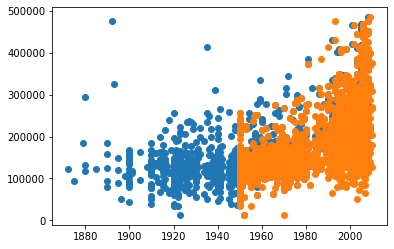

In [43]:
plt.scatter(x=train['year_built'], y=train['saleprice'])
plt.scatter(x=train['year_remod/add'], y=train['saleprice']);

This shows me that there is a slightly positive correlation between year built/remodeled with housing price.

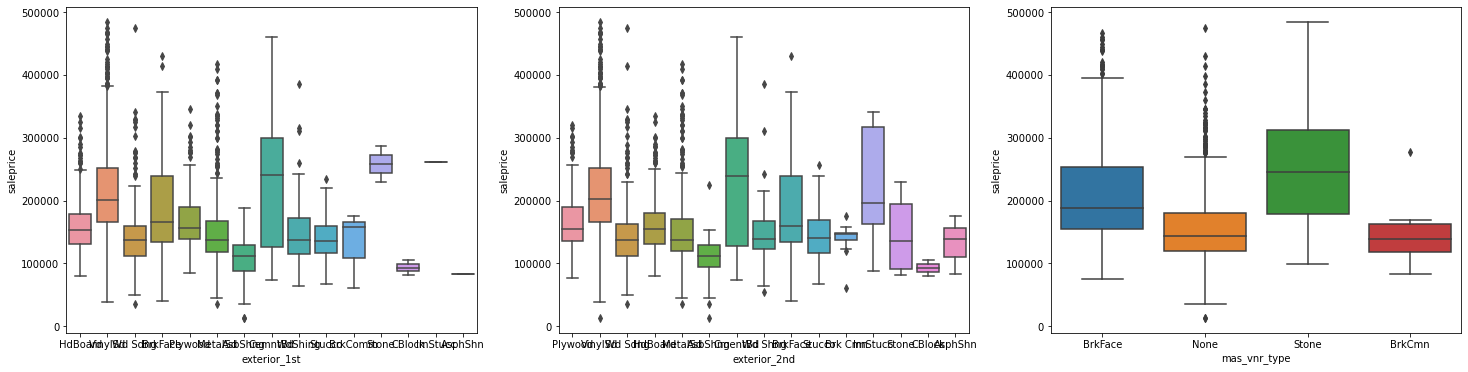

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))
sns.boxplot(x=train['exterior_1st'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['exterior_2nd'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['mas_vnr_type'], y=train['saleprice'], ax=ax[2]);

- The exterior covering on the house seems to have an impact on housing price, with only a few really sticking out. Most seem to be around the same range.
- The masonry veneer type has a larger impact on housing price.

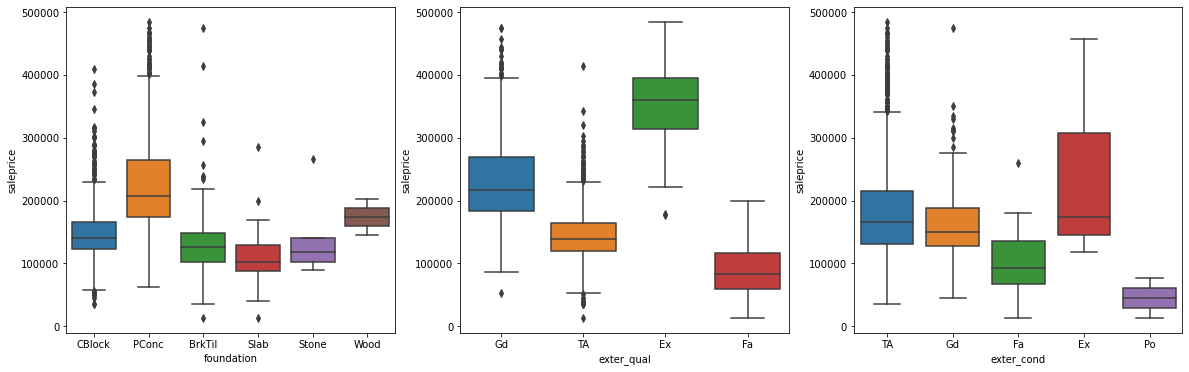

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['foundation'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['exter_qual'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['exter_cond'], y=train['saleprice'], ax=ax[2]);

The foundation has a few materials that really drive the pricing.

In [46]:
train['exter_qual'] = train['exter_qual'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3',
    'Gd':'4', 'Ex':'5'}
).astype(int)

train['exter_qual'].dtype

dtype('int32')

In [47]:
train['exter_cond'] = train['exter_cond'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3',
    'Gd':'4', 'Ex':'5'}
).astype(int)

train['exter_cond'].dtype

dtype('int32')

In [48]:
test['exter_qual'] = test['exter_qual'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3',
    'Gd':'4', 'Ex':'5'}
).astype(int)

test['exter_qual'].dtype

dtype('int32')

In [49]:
test['exter_cond'] = test['exter_cond'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3',
    'Gd':'4', 'Ex':'5'}
).astype(int)

test['exter_cond'].dtype

dtype('int32')

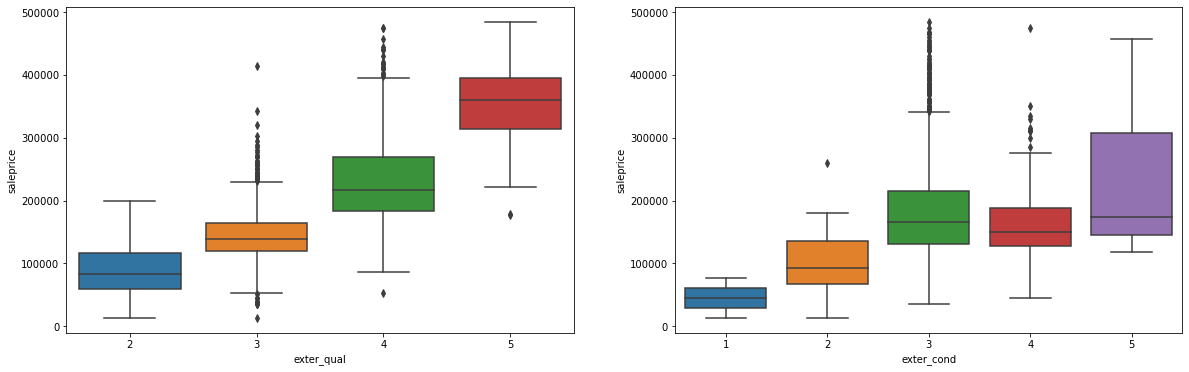

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x=train['exter_qual'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['exter_cond'], y=train['saleprice'], ax=ax[1]);

After endoding the variables, both exterior condition and quality have a strongly positive linear relationship to saleprice.

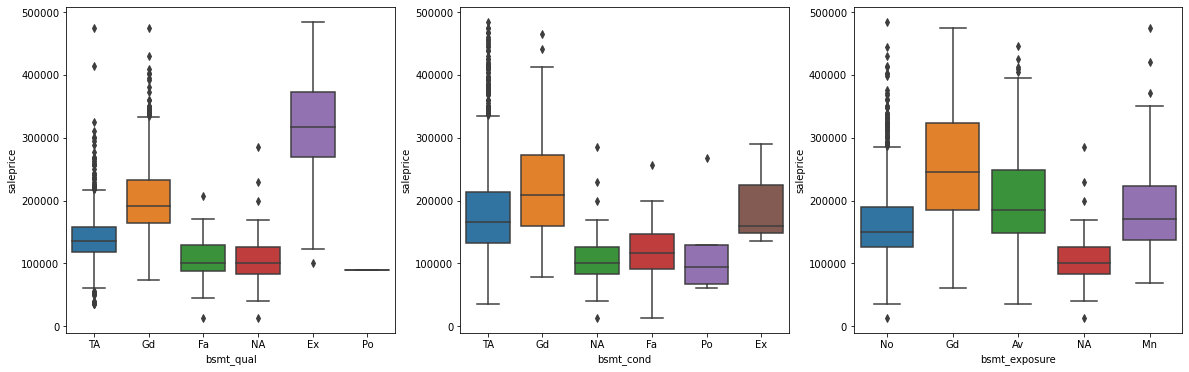

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['bsmt_qual'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['bsmt_cond'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['bsmt_exposure'], y=train['saleprice'], ax=ax[2]);

These variables are all ordinal, so in order to see the relationship need to be endcoded. I did that below, but since there are NaN values, will need to be imputed before fully seeing the relationship.

In [52]:
train['bsmt_qual'] = train['bsmt_qual'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
)

train['bsmt_qual'].dtype

dtype('O')

In [53]:
train['bsmt_cond'] = train['bsmt_cond'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
)

train['bsmt_cond'].dtype

dtype('O')

In [54]:
train['bsmt_exposure'] = train['bsmt_exposure'].replace(
    {'NA':'0', 'No':'1', 'Mn':'2', 
     'Av':'3', 'Gd':'4'}
)

train['bsmt_exposure'].dtype

dtype('O')

In [55]:
test['bsmt_qual'] = test['bsmt_qual'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['bsmt_qual'].dtype

dtype('int32')

In [56]:
test['bsmt_cond'] = test['bsmt_cond'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['bsmt_cond'].dtype

dtype('int32')

In [57]:
test['bsmt_exposure'] = test['bsmt_exposure'].replace(
    {'NA':'0', 'No':'1', 'Mn':'2', 
     'Av':'3', 'Gd':'4'}
).astype(int)

test['bsmt_exposure'].dtype

dtype('int32')

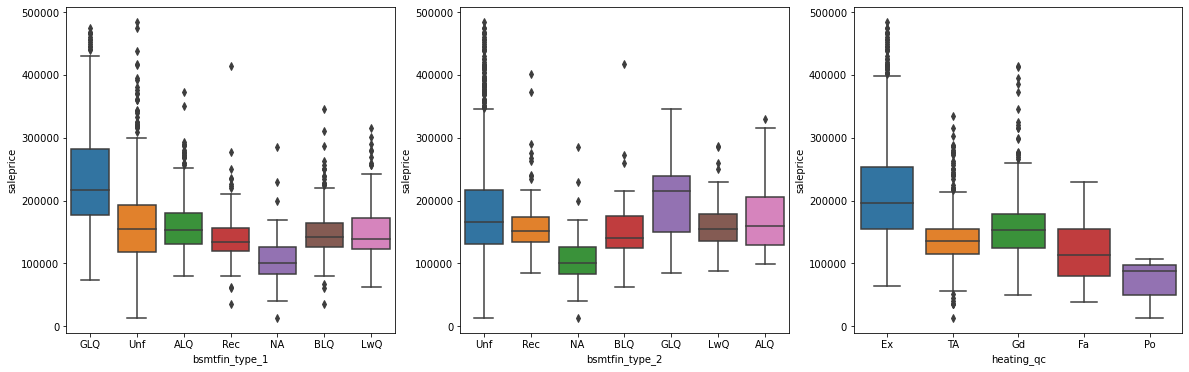

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['bsmtfin_type_1'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['bsmtfin_type_2'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['heating_qc'], y=train['saleprice'], ax=ax[2]);

These first two plots have the same problem as above.

In [59]:
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].replace(
    {'NA':'0', 'Unf':'1', 'LwQ':'2', 
     'Rec':'3', 'BLQ':'4', 'ALQ':'5',
    'GLQ':'6'}
)

train['bsmtfin_type_1'].dtype

dtype('O')

In [60]:
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].replace(
    {'NA':'0', 'Unf':'1', 'LwQ':'2', 
     'Rec':'3', 'BLQ':'4', 'ALQ':'5',
    'GLQ':'6'}
)

train['bsmtfin_type_2'].dtype

dtype('O')

In [61]:
train['heating_qc'] = train['heating_qc'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

train['heating_qc'].dtype

dtype('int32')

In [62]:
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].replace(
    {'NA':'0', 'Unf':'1', 'LwQ':'2', 
     'Rec':'3', 'BLQ':'4', 'ALQ':'5',
    'GLQ':'6'}
).astype(int)

test['bsmtfin_type_1'].dtype

dtype('int32')

In [63]:
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].replace(
    {'NA':'0', 'Unf':'1', 'LwQ':'2', 
     'Rec':'3', 'BLQ':'4', 'ALQ':'5',
    'GLQ':'6'}
).astype(int)

test['bsmtfin_type_2'].dtype

dtype('int32')

In [64]:
test['heating_qc'] = test['heating_qc'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['heating_qc'].dtype

dtype('int32')

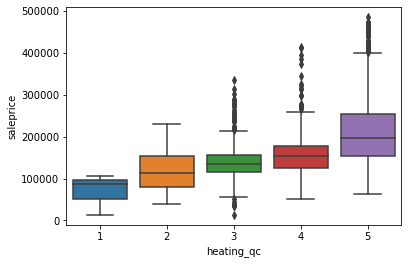

In [65]:
sns.boxplot(x=train['heating_qc'], y=train['saleprice']);

The heating QC has a positive linear relationship with sale price.

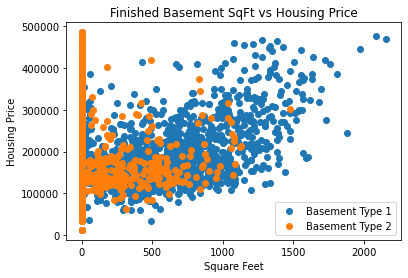

In [66]:
plt.scatter(x=train['bsmtfin_sf_1'], y=train['saleprice'], label='Basement Type 1')
plt.scatter(x=train['bsmtfin_sf_2'], y=train['saleprice'], label='Basement Type 2')
plt.title('Finished Basement SqFt vs Housing Price')
plt.ylabel('Housing Price')
plt.xlabel('Square Feet')
plt.legend();

The finished basement square footage has a positive relationship with sale price.

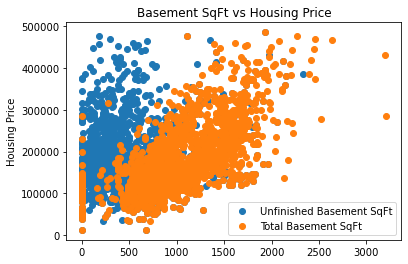

In [67]:
plt.scatter(x=train['bsmt_unf_sf'], y=train['saleprice'], label='Unfinished Basement SqFt')
plt.scatter(x=train['total_bsmt_sf'], y=train['saleprice'], label='Total Basement SqFt')
plt.title('Basement SqFt vs Housing Price')
plt.ylabel('Housing Price')
plt.legend();

Basement sqft has a mostly positive relationship (just not super strong) with housing price. Though total basement sqft has a stronger relationship than unifinished sqft.

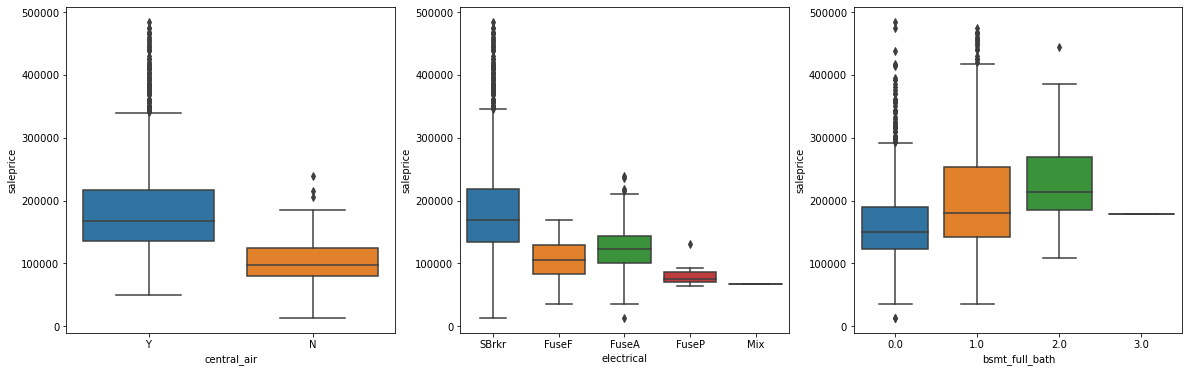

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['central_air'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['electrical'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['bsmt_full_bath'], y=train['saleprice'], ax=ax[2]);

- Central air and basement full bath have a pretty significant influence over sale price.

In [69]:
train['electrical'] = train['electrical'].replace(
    {'Mix':'1', 'FuseP':'2', 'FuseF':'3', 'FuseA':'4', 'SBrkr':'5'}
).astype(int)

train['electrical'].dtype

dtype('int32')

In [70]:
test['electrical'] = test['electrical'].replace(
    {'Mix':'1', 'FuseP':'2', 'FuseF':'3', 'FuseA':'4', 'SBrkr':'5'}
)

test['electrical'].dtype

dtype('O')

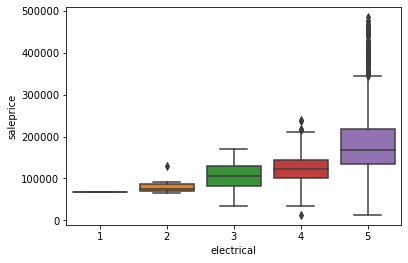

In [71]:
sns.boxplot(x=train['electrical'], y=train['saleprice']);

There is a positive relationship between the electrical system and sale price.

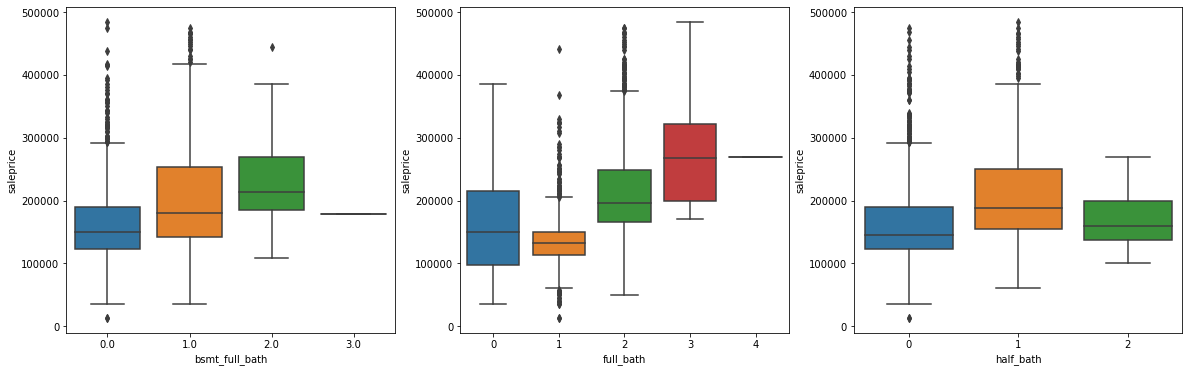

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['bsmt_full_bath'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['full_bath'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['half_bath'], y=train['saleprice'], ax=ax[2]);

- Basement full baths and above grade full baths have a positive linear relationship with sale price.
- Half baths above grade don't seem to have a very strong influence over sale price.

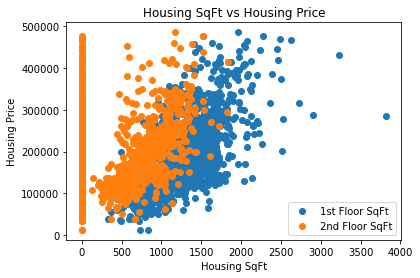

In [73]:
plt.scatter(x=train['1st_flr_sf'], y=train['saleprice'], label='1st Floor SqFt')
plt.scatter(x=train['2nd_flr_sf'], y=train['saleprice'], label='2nd Floor SqFt')
plt.title('Housing SqFt vs Housing Price')
plt.ylabel('Housing Price')
plt.xlabel('Housing SqFt')
plt.legend();

The square footage of the house has a positive linear relationship with housing price.

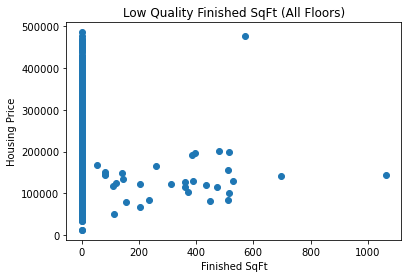

In [74]:
plt.scatter(x=train['low_qual_fin_sf'], y=train['saleprice'])
plt.title('Low Quality Finished SqFt (All Floors)')
plt.ylabel('Housing Price')
plt.xlabel('Finished SqFt');

Not much of a relationship between low quality finished sqft and housing price, other than most of the houses are priced low.

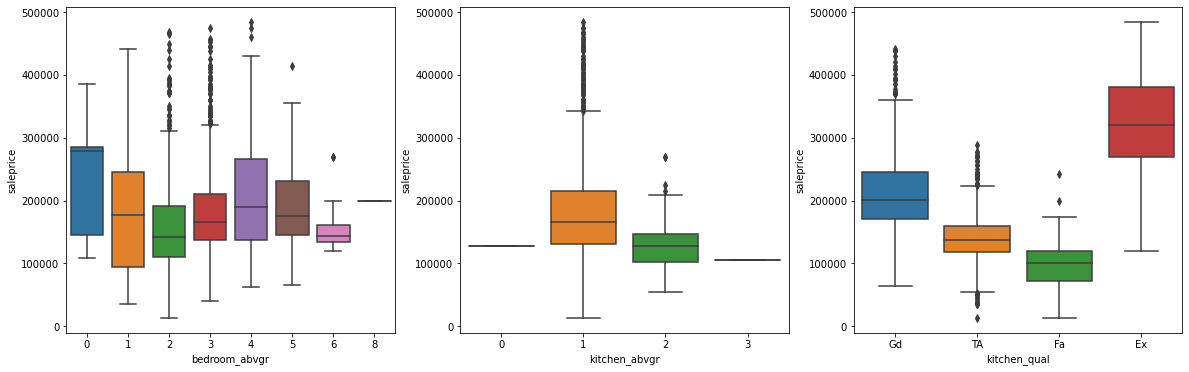

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['bedroom_abvgr'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['kitchen_abvgr'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['kitchen_qual'], y=train['saleprice'], ax=ax[2]);

- The amount of bedrooms and kitchens above grade don't have a huge impact on housing price. The amount of bedrooms do more-so than kitchens though.

In [76]:
train['kitchen_qual'] = train['kitchen_qual'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

train['kitchen_qual'].dtype

dtype('int32')

In [77]:
test['kitchen_qual'] = test['kitchen_qual'].replace(
    {'Po':'1', 'Fa':'2', 'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['kitchen_qual'].dtype

dtype('int32')

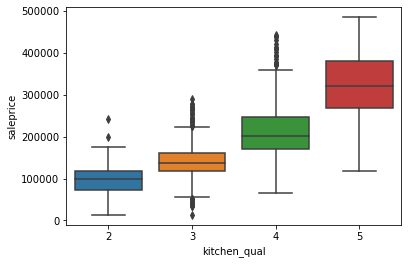

In [78]:
sns.boxplot(x=train['kitchen_qual'], y=train['saleprice']);

There is a pretty strong positive linear relationship between kitchen quality and sale price.

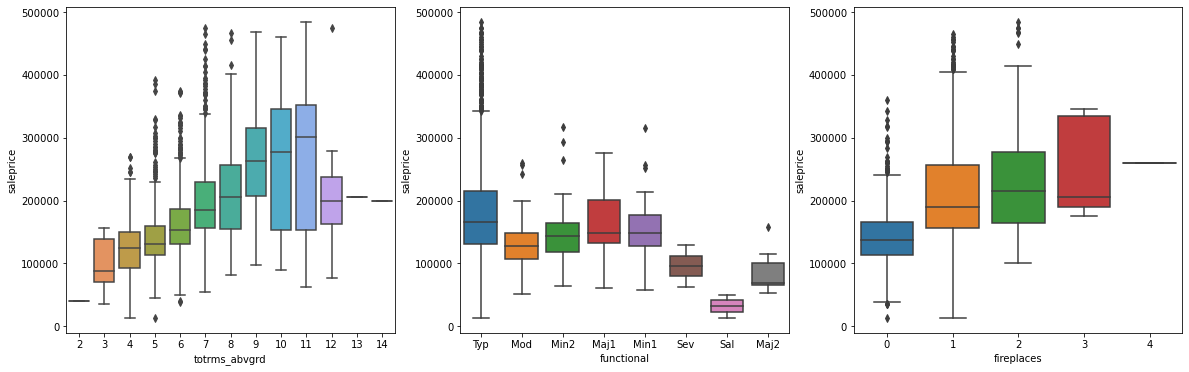

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['totrms_abvgrd'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['functional'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['fireplaces'], y=train['saleprice'], ax=ax[2]);

There is a positive linear relationship between total rooms above grade and amount of fireplaces.

In [80]:
train['functional'] = train['functional'].replace(
    {'Sal':'1', 'Sev':'2', 'Maj2':'3', 'Maj1':'4',
     'Mod':'5', 'Min2':'6', 'Min1':'7','Typ':'8'}
).astype(int)

train['functional'].dtype

dtype('int32')

In [81]:
test['functional'] = test['functional'].replace(
    {'Sal':'1', 'Sev':'2', 'Maj2':'3', 'Maj1':'4',
     'Mod':'5', 'Min2':'6', 'Min1':'7','Typ':'8'}
).astype(int)

test['functional'].dtype

dtype('int32')

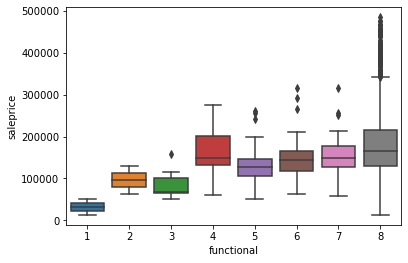

In [82]:
sns.boxplot(x=train['functional'], y=train['saleprice']);

There is a mostly positive linear relationship between home functionality and sale price.

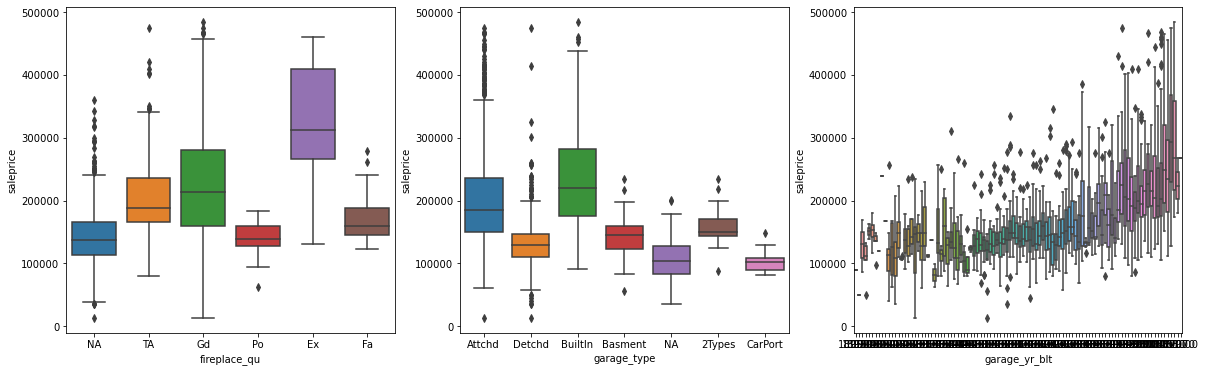

In [83]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['fireplace_qu'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['garage_type'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['garage_yr_blt'], y=train['saleprice'], ax=ax[2]);

- The garage type seems to have an impact on housing price.
- The year the garage was built (though the labels are all muddy and the plot hard to read) show a positive linear relationship with housing price.

In [84]:
train['fireplace_qu'] = train['fireplace_qu'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

train['fireplace_qu'].dtype

dtype('int32')

In [85]:
test['fireplace_qu'] = test['fireplace_qu'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['fireplace_qu'].dtype

dtype('int32')

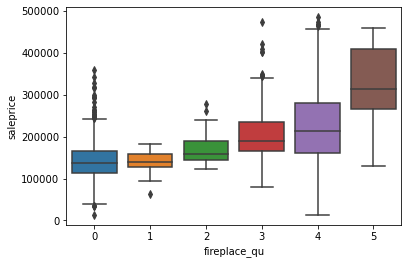

In [86]:
sns.boxplot(x=train['fireplace_qu'], y=train['saleprice']);

There is a positive linear relationship with fireplace quality and housing price.

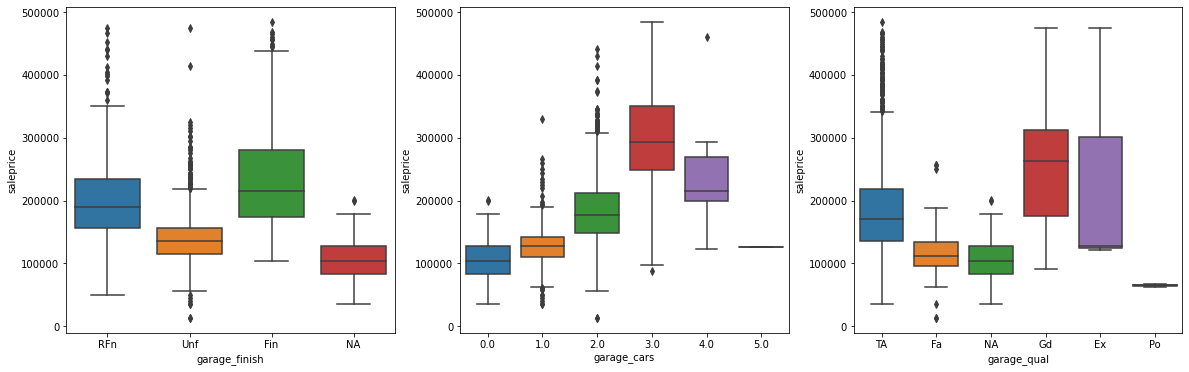

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['garage_finish'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['garage_cars'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['garage_qual'], y=train['saleprice'], ax=ax[2]);

- Garage finish and garage quality have NaN values in them, so in order to interpret them properly imputing will need to happen. But they do seem to have an impact on sale price.
- The size of the garage in regards to car capacity has a pretty strong impact on sale price.

In [88]:
train['garage_finish'] = train['garage_finish'].replace(
    {'NA':'0', 'Unf':'1', 'RFn':'2', 
     'Fin':'3'}
)

train['garage_finish'].dtype

dtype('O')

In [89]:
train['garage_qual'] = train['garage_qual'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
)

train['garage_qual'].dtype

dtype('O')

In [90]:
test['garage_finish'] = test['garage_finish'].replace(
    {'NA':'0', 'Unf':'1', 'RFn':'2', 
     'Fin':'3'}
)

test['garage_finish'].dtype

dtype('O')

In [91]:
test['garage_qual'] = test['garage_qual'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['garage_qual'].dtype

dtype('int32')

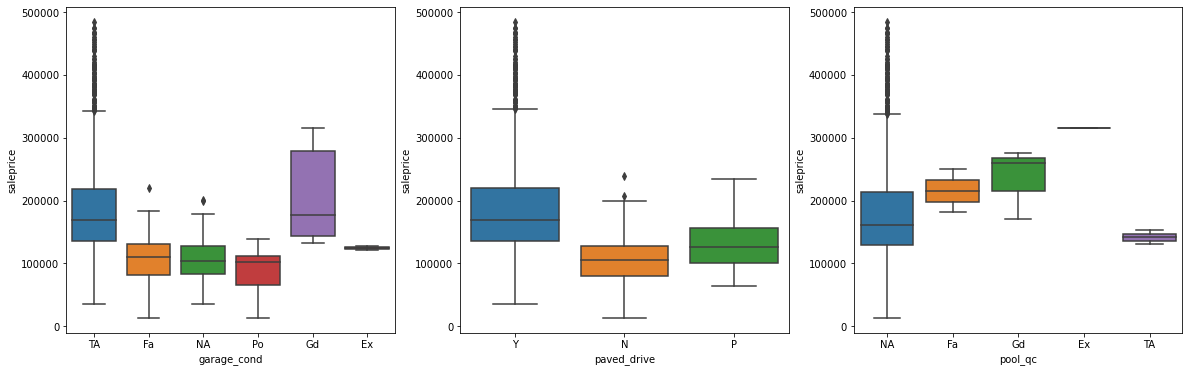

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['garage_cond'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['paved_drive'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['pool_qc'], y=train['saleprice'], ax=ax[2]);

- Most values in garage condition don't seem to have a huge impact on housing sale price, but some definitely do. Again, in order to see the true relationship the NaN values will need to be dealt with.

In [93]:
train['garage_cond'] = train['garage_cond'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
)

train['garage_cond'].dtype

dtype('O')

In [94]:
train['pool_qc'] = train['pool_qc'].replace(
    {'NA':'0', 'Fa':'1', 'TA':'2', 
     'Gd':'3', 'Ex':'4'}
).astype(int)

train['pool_qc'].dtype

dtype('int32')

In [95]:
train['paved_drive'] = train['paved_drive'].replace(
    {'N':'1', 'P':'2', 'Y':'3'}
).astype(int)

train['paved_drive'].dtype

dtype('int32')

In [96]:
test['garage_cond'] = test['garage_cond'].replace(
    {'NA':'0', 'Po':'1', 'Fa':'2', 
     'TA':'3', 'Gd':'4', 'Ex':'5'}
).astype(int)

test['garage_cond'].dtype

dtype('int32')

In [97]:
test['pool_qc'] = test['pool_qc'].replace(
    {'NA':'0', 'Fa':'1', 'TA':'2', 
     'Gd':'3', 'Ex':'4'}
).astype(int)

test['pool_qc'].dtype

dtype('int32')

In [98]:
test['paved_drive'] = test['paved_drive'].replace(
    {'N':'1', 'P':'2', 'Y':'3'}
).astype(int)

test['paved_drive'].dtype

dtype('int32')

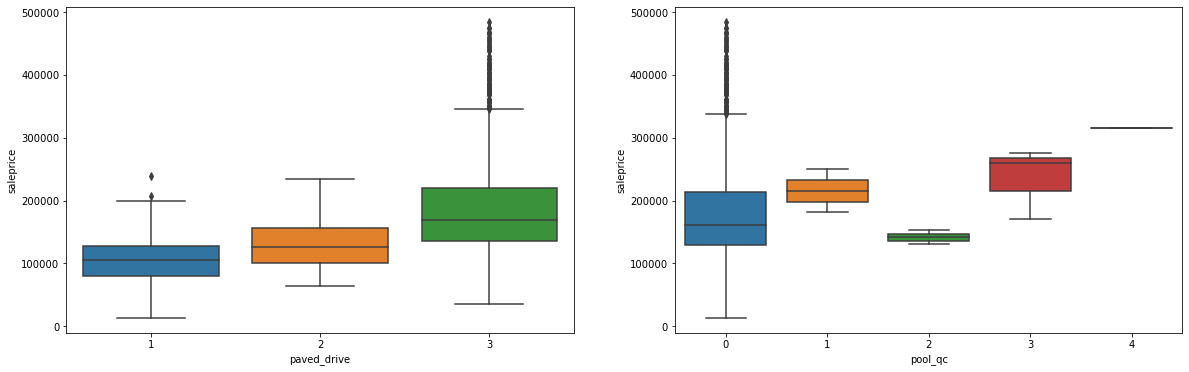

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x=train['paved_drive'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['pool_qc'], y=train['saleprice'], ax=ax[1]);

- Paved drive definitely has a positive linear relationship with sale price.
- Pool qc doesn't have a distinct positive linear relationship with sale price, but is somewhat positive.

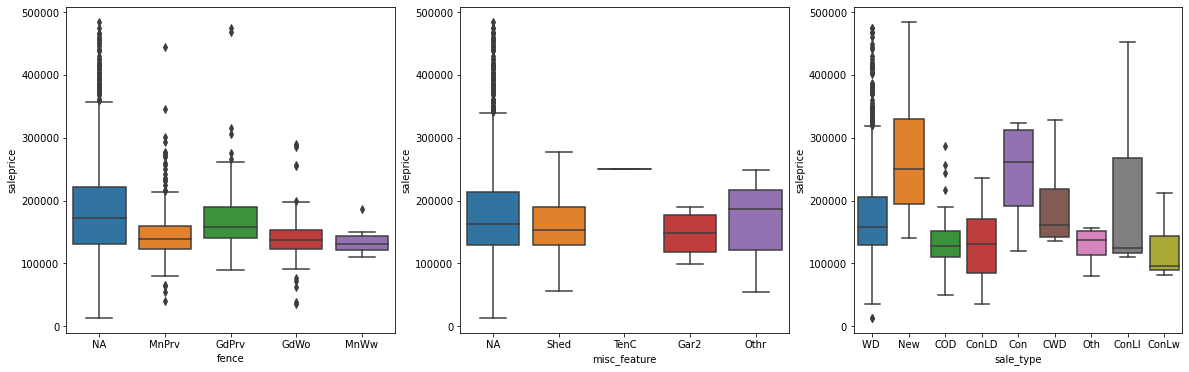

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x=train['fence'], y=train['saleprice'], ax=ax[0])
sns.boxplot(x=train['misc_feature'], y=train['saleprice'], ax=ax[1])
sns.boxplot(x=train['sale_type'], y=train['saleprice'], ax=ax[2]);

- Misc feature is pretty flat overall, not real impact on housing price.
- The sale type definitley has an impact on housing price.

In [101]:
train['fence'] = train['fence'].replace(
    {'NA':'0', 'MnWw':'1', 'GdWo':'2', 
     'MnPrv':'3', 'GdPrv':'4'}
).astype(int)

train['fence'].dtype

dtype('int32')

In [102]:
test['fence'] = test['fence'].replace(
    {'NA':'0', 'MnWw':'1', 'GdWo':'2', 
     'MnPrv':'3', 'GdPrv':'4'}
).astype(int)

test['fence'].dtype

dtype('int32')

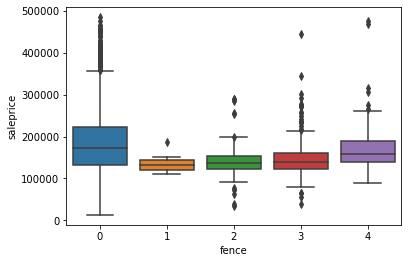

In [103]:
sns.boxplot(x=train['fence'], y=train['saleprice']);

The fence quality is also pretty flat overall, no standouts for impact on house price.

In [104]:
train.to_csv('../datasets/train_cleaned.csv', index=False)

In [105]:
test.to_csv('../datasets/test_cleaned.csv', index=False)